# **Método para la segmentación de imágenes de resonancia mágnetica cerebrales usando una arquitectura de red neuronal basada en modelos de atención**


**Profesor:**

- **Ph.D. John Willian Branch Bedoya**


**Tutores del trabajo de maestría:**

- **John Willian Branch Bedoya Ph.D.**

- **German Sanchez Torres Ph.D.**


**Presenta: Ms.C. Camilo Andres Laiton Bonadiez**

**Artículo publicado**: <a href="https://www.mdpi.com/1424-8220/22/7/2559">Deep 3D Neural Network for Brain Structures Segmentation Using Self-Attention Modules in MRI Images</a>

<img src="https://pbs.twimg.com/media/EIoP2LTXYAA54Lk.jpg" width="500"/>
<img src="https://investigacion.unimagdalena.edu.co/Content/Imagenes/Unidades/unidad20210601152739.951.jpg" width="400" height="150"/>


<img src="https://www.mdpi.com/sensors/sensors-22-02559/article_deploy/html/images/sensors-22-02559-g005.png" width="1000"/>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


## Uso de librería para guardar configuraciones en modelos de aprendizaje de máquinas

ML Collections es una biblioteca de Python Collections diseñada por Google para casos de uso de Machine Learning (ML).

<a href="https://github.com/google/ml_collections"> ML Collections Repository </a>

In [ ]:
!pip install ml_collections & pip install segmentation_models & pip install patchify & pip install nibabel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ml_collections: filename=ml_collections-0.1.1-py3-none-any.whl size=94524 sha256=36e6aa40b15dea330d21863f46f56c824eb1e1496ae2b647a2e104eb15b9099a
  Stored in directory: /root/.cache/pip/wheels/7b/89/c9/a9b87790789e94aadcfc393c283e3ecd5ab916aed0a31be8fe
Successfully built ml_collections


## **Descripción general de la arquitectura**

Arquitectura clásica encoder-decoder inspirada inicialmente por el trabajo de
<a href="https://arxiv.org/pdf/1505.04597.pdf"> U-NET </a>

- Encoder:
  - Bloques convolucionales
  - Bloques de Transformers (4 capas de 4 cabezales)

- Decoder
  - Bloques convolucionales
  - Bloques de upsampling

- Función de pérdida
  - Dice y Focal combinadas, Dice acepta pesos de clases

- Técnica de calculo de pesos
  - Cálculo de la mediana frecuencia de los pesos

- Aumento de datos
  - Deformaciones elásticas 3D

  
<img src="https://www.mdpi.com/sensors/sensors-22-02559/article_deploy/html/images/sensors-22-02559-g002.png" width="1000"/>

## Problema altamente desbalanceado por tal motivo se usaron las técnicas anteriormente mencionadas

<img src="https://www.mdpi.com/sensors/sensors-22-02559/article_deploy/html/images/sensors-22-02559-g003.png" width="1000"/>

In [ ]:
import ml_collections

def get_config_local_path():
    """
        Returns the transformer configuration for testing
    """

    config = ml_collections.ConfigDict()
    config.config_name = "testing"
    config.dataset_path = 'dataset_3D_p64/'
    config.unbatch = True
    config.learning_rate = 0.001
    config.weight_decay = 1e-4
    config.momentum = 0.9
    config.dropout = 0.2
    config.batch_size = 8
    config.num_epochs = 100
    config.image_height = 64
    config.image_width = 64
    config.image_depth = 64
    config.image_channels = 1
    config.image_size = (config.image_height, config.image_width, config.image_depth, config.image_channels)
    config.skip_connections = True
    config.data_augmentation = False
    config.loss_fnc = 'dice_focal_loss' #'dice_focal_loss'#'focal_tversky'#'weighted_crossentropy'#'dice_focal_loss'#'tversky' #crossentropy
    config.decoder_conv_localpath = False
    config.decoder_conv_globalpath = False
    config.act_func = 'leaky_relu'

    config.transformer = ml_collections.ConfigDict()
    config.transformer.patch_size = 16
    config.transformer.num_patches = (config.image_size[0] // config.transformer.patch_size)**3
    config.conv_projection = 64

    config.transformer.projection_dim = 64# 64 #128
    config.transformer.units = [
        config.transformer.projection_dim * 3, # (3) 1536 --  (4) 2048
        # config.transformer.projection_dim * 2,
        config.transformer.projection_dim, # 512
        # config.transformer.projection_dim, # 64
    ]
    config.transformer.layers = 4#4
    config.transformer.num_heads = 4 #8
    config.transformer.dropout_rate = 0.1
    config.transformer.normalization_rate = 1e-6

    config.decoder_filters = [
      config.transformer.projection_dim,
      64,
      32,
      16,
    ]

    config.n_classes = 4
    config.activation = 'softmax'

    return config

def get_config_local_path_2():
    """
        Returns the transformer configuration for testing
    """

    config = ml_collections.ConfigDict()
    config.config_name = "testing"
    config.dataset_path = 'dataset_3D_p64/'
    config.unbatch = True
    config.learning_rate = 0.001
    config.weight_decay = 1e-4
    config.momentum = 0.9
    config.dropout = 0.2
    config.batch_size = 8
    config.num_epochs = 100
    config.image_height = 64
    config.image_width = 64
    config.image_depth = 64
    config.image_channels = 1
    config.image_size = (config.image_height, config.image_width, config.image_depth, config.image_channels)
    config.skip_connections = True
    config.data_augmentation = False
    config.loss_fnc = 'dice_focal_loss' #'dice_focal_loss'#'focal_tversky'#'weighted_crossentropy'#'dice_focal_loss'#'tversky' #crossentropy
    config.decoder_conv_localpath = False
    config.decoder_conv_globalpath = False
    config.act_func = 'leaky_relu'

    config.transformer = ml_collections.ConfigDict()
    config.transformer.patch_size = 8
    config.transformer.num_patches = (config.image_size[0] // config.transformer.patch_size)**3
    config.conv_projection = 512

    config.transformer.projection_dim = 64# 64 #128
    config.transformer.units = [
        config.transformer.projection_dim * 3, # (3) 1536 --  (4) 2048
        # config.transformer.projection_dim * 2,
        config.transformer.projection_dim, # 512
        # config.transformer.projection_dim, # 64
    ]
    config.transformer.layers = 4#4
    config.transformer.num_heads = 4 #8
    config.transformer.dropout_rate = 0.1
    config.transformer.normalization_rate = 1e-4

    config.decoder_filters = [
      config.transformer.projection_dim,
      64,
      32,
      16,
    ]

    config.n_classes = 4
    config.activation = 'softmax'

    return config

In [ ]:
#@title Celda para configurar los bloques de la red neuronal diseñada.
import tensorflow as tf
# import tensorflow_addons as tfa
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

class ConvolutionalBlock(layers.Layer):

    def __init__(self, filters, kernel_size, strides, activation='relu', padding='same', **kwargs):
        super(ConvolutionalBlock, self).__init__(**kwargs)
        self.filters = filters
        self.kernel_size = kernel_size
        self.strides = strides
        # self.padding = padding
        # self.dropout_rate = dropout_rate

        if (activation == 'leaky_relu'):
            activation = tf.nn.leaky_relu
        else:
            activation = tf.nn.relu

        self.activation = activation

        # Layers
        self.conv_a = layers.Conv3D(
            filters=self.filters,
            kernel_size=self.kernel_size,
            strides=self.strides,
            padding=padding
        )

        self.bn_a = layers.BatchNormalization()
        self.activation_fnc = layers.Activation(self.activation)

    def call(self, inputs):
        x = self.conv_a(inputs)
        x = self.bn_a(x)
        return self.activation_fnc(x)

    def get_config(self):
        config = super().get_config().copy()
        config.update({
            'filters' : self.filters,
            'kernel_size' : self.kernel_size,
            'activation' : self.activation,
            # layers
            'conv_a' : self.conv_a,
            'bn_a' : self.bn_a,
            'activation_fnc' : self.activation_fnc,
        })
        return config

class MLPBlock(layers.Layer):
    def __init__(self, hidden_units, dropout_rate, activation=None, **kwarks):
        super(MLPBlock, self).__init__(**kwarks)
        self.hidden_units = hidden_units
        self.dropout_rate = dropout_rate

        if not activation:
            activation = tf.nn.gelu

        self.activation = activation

        # creating layers
        self.layers = []

        for units in self.hidden_units:
            self.layers.append(layers.Dense(units, activation=self.activation))
            self.layers.append(layers.Dropout(self.dropout_rate))

    def call(self, inputs):

        for layer in self.layers:
            inputs = layer(inputs)

        return inputs

    def get_config(self):
        config = super().get_config().copy()
        config.update({
            'hidden_units' : self.hidden_units,
            'dropout_rate' : self.dropout_rate,
            'activation' : self.activation,
            'layers' : self.layers,
        })
        return config

def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

class Patches(layers.Layer):
    def __init__(self, patch_size, **kwarks):
        super(Patches, self).__init__(**kwarks)
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]

        # patches = tf.image.extract_patches(
        #     images=images,
        #     sizes=[1, self.patch_size, self.patch_size, 1],
        #     strides=[1, self.patch_size, self.patch_size, 1],
        #     rates=[1, 1, 1, 1],
        #     padding="VALID",
        # )

        patches = tf.extract_volume_patches(
            input=images,
            ksizes=[1, self.patch_size, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, self.patch_size, 1],
            padding='VALID',
        )

        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

    def get_config(self):
        config = super().get_config().copy()
        config.update({
            'patch_size' : self.patch_size
        })
        return config

class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim, **kwarks):
        super(PatchEncoder, self).__init__(**kwarks)
        self.num_patches = num_patches

        # Layers
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

    def get_config(self):
        config = super().get_config().copy()
        config.update({
            'num_patches' : self.num_patches,
            # layers
            'projection' : self.projection,
            'position_embedding' : self.position_embedding,
        })
        return config

class ConvProjection(layers.Layer):
    def __init__(self, reshape_dim, projection_dim, num_patches, **kwargs):
        super(ConvProjection, self).__init__(**kwargs)
        self.reshape_dim = reshape_dim
        self.projection_dim = projection_dim
        self.num_patches = num_patches

        # Layers
        self.reshape_lyr = layers.Reshape(
            target_shape=(
                self.reshape_dim,
                self.projection_dim
            ),
        )

        # conv layer encoder
        self.conv_layer_encoded = PatchEncoder(
            num_patches=self.num_patches,
            projection_dim=self.projection_dim,
        )

    def call(self, conv_input):
        output = self.reshape_lyr(conv_input)
        output = self.conv_layer_encoded(output)
        return output

    def get_config(self):
        config = super().get_config().copy()
        config.update({
            'reshape_dim' : self.reshape_dim,
            'projection_dim' : self.projection_dim,
            'num_patches' : self.num_patches,
            # layers
            'reshape_lyr' : self.reshape_lyr,
            'conv_layer_encoded' : self.conv_layer_encoded
        })
        return config

class TransformerBlock(layers.Layer):
    def __init__(self, num_heads, projection_dim, dropout_rate, normalization_rate, transformer_units, **kwarks):
        super(TransformerBlock, self).__init__(**kwarks)
        self.num_heads = num_heads
        self.projection_dim = projection_dim
        self.dropout_rate = dropout_rate
        self.normalization_rate = normalization_rate
        self.transformer_units = transformer_units

        # Layers
        self.ln_a = layers.LayerNormalization(epsilon=self.normalization_rate)
        self.attention_layer_a = layers.MultiHeadAttention(
            num_heads = self.num_heads,
            key_dim = self.projection_dim,
            dropout = self.dropout_rate,
        )
        self.add_a = layers.Add()

        self.ln_b = layers.LayerNormalization(epsilon=self.normalization_rate)
        self.mlp_block_b = MLPBlock(
            hidden_units=self.transformer_units,
            dropout_rate=self.dropout_rate
        )

        self.add_b = layers.Add()

    def call(self, encoded_patches):
        x1 = self.ln_a(encoded_patches)
        attention_layer = self.attention_layer_a(x1, x1)
        # print(attention_layer.shape)
        # attention_layer = self.softmax_b(attention_layer)

        x2 = self.add_a([attention_layer, encoded_patches])
        x3 = self.ln_b(x2)
        x3 = self.mlp_block_b(x3)
        x3 = self.add_b([x3, x2])
        return x3

    def get_config(self):
        config = super().get_config().copy()
        config.update({
            'num_heads' : self.num_heads,
            'projection_dim' : self.projection_dim,
            'dropout_rate' : self.dropout_rate,
            'normalization_rate' : self.normalization_rate,
            'transformer_units' : self.transformer_units,
            # layers
            'ln_a' : self.ln_a,
            'attention_layer_a' : self.attention_layer_a,
            'add_a' : self.add_a,
            'ln_b' : self.ln_b,
            'mlp_block_b' : self.mlp_block_b,
            'add_b' : self.add_b,
        })
        return config

class DecoderBlockCup(layers.Layer):

    def __init__(self, target_shape, filters, normalization_rate, pool_size=(2, 2, 1), kernel_size=3, activation='relu', upsample=True, **kwarks):
        super(DecoderBlockCup, self).__init__(**kwarks)
        self.normalization_rate = normalization_rate
        self.target_shape = target_shape
        self.filters = filters
        self.kernel_size = kernel_size
        self.pool_size = pool_size
        self.upsample = upsample

        if (activation == 'leaky_relu'):
            activation = tf.nn.leaky_relu
        else:
            activation = tf.nn.relu

        self.activation = activation

        # Layers
        self.ln_a = layers.LayerNormalization(epsilon=self.normalization_rate, name="decoder_block_cup_ln_a")
        self.reshape_a = layers.Reshape(
            target_shape=self.target_shape,
            name="decoder_block_cup_reshape_1"
        )
        # self.conv_a = layers.Conv2D(filters=self.filters, kernel_size=self.kernel_size*2, strides=1, padding='same')
        self.conv_a = layers.Conv3D(
            filters=self.filters,
            kernel_size=self.kernel_size,
            strides=1,
            padding='same'
        )
        # self.max_pool_a = layers.MaxPooling3D(pool_size=self.pool_size)
        self.bn_a = layers.BatchNormalization()
        self.activation_fnc = layers.Activation(self.activation)
        self.upsample_a = layers.UpSampling3D(
            size=(2, 2, 2)
        )

    def call(self, encoder_output):
        # x = self.ln_a(encoder_output)
        x = self.reshape_a(encoder_output)
        x = self.conv_a(x)
        x = self.bn_a(x)
        x = self.activation_fnc(x)
        if (self.upsample):
            x = self.upsample_a(x)
        return x

    def get_config(self):
        config = super().get_config().copy()
        config.update({
            'normalization_rate' : self.normalization_rate,
            'target_shape' : self.target_shape,
            'filters' : self.filters,
            'kernel_size' : self.kernel_size,
            'pool_size' : self.pool_size,
            # layers
            'ln_a' : self.ln_a,
            'reshape_a' : self.reshape_a,
        })
        return config

class DecoderTransposeBlock(layers.Layer):
    def __init__(self, filters, kernel_size=3, strides=(2, 2, 2), activation='relu', **kwargs):
        super(DecoderTransposeBlock, self).__init__(**kwargs)
        self.filters = filters
        self.kernel_size = kernel_size
        self.strides = strides

        if (activation == 'leaky_relu'):
            activation = tf.nn.leaky_relu
        else:
            activation = tf.nn.relu

        self.activation = activation

        # Layers
        self.conv_tr = layers.Conv3DTranspose(
            filters=self.filters,
            kernel_size=self.kernel_size,
            strides=self.strides,
            padding='same',
        )

        self.bn = layers.BatchNormalization()
        self.activation_layer = layers.Activation(self.activation)

    def call(self, inputs):
        x = self.conv_tr(inputs)
        x = self.bn(x)
        x = self.activation_layer(x)
        return x

    def get_config(self):
        config = super().get_config().copy()
        config.update({
            'filters' : self.filters,
            'kernel_size' : self.kernel_size,
            'strides' : self.strides,
            'activation': self.activation,
            # layers
            'conv_tr' : self.conv_tr,
            'bn' : self.bn,
            'activation_layer' : self.activation_layer,
        })
        return config

class DecoderUpsampleBlock(layers.Layer):

    def __init__(self, filters, kernel_size=3, strides=(1, 1, 1), pool_size=(2, 2, 1), activation='relu', **kwarks):
        super(DecoderUpsampleBlock, self).__init__(**kwarks)
        self.filters = filters
        self.kernel_size = kernel_size
        self.strides = strides
        self.pool_size = pool_size

        if (activation == 'leaky_relu'):
            activation = tf.nn.leaky_relu
        else:
            activation = tf.nn.relu

        self.activation = activation

        # Layers
        self.upsample_a = layers.UpSampling3D(
            size=(2, 2, 2)
        )

        self.conv_a = layers.Conv3D(
            filters=self.filters,
            kernel_size=self.kernel_size,
            strides=self.strides,
            padding='same'
        )

        # self.max_pool_a = layers.MaxPooling2D(pool_size=self.pool_size)
        self.bn_a = layers.BatchNormalization()
        self.activation_fnc = layers.Activation(self.activation)

    def call(self, decoder_input):
        x = self.conv_a(decoder_input)
        x = self.activation_fnc(x)
        x = self.bn_a(x)
        x = self.upsample_a(x)
        return x

    def get_config(self):
        config = super().get_config().copy()
        config.update({
            'filters' : self.filters,
            'kernel_size' : self.kernel_size,
            'strides' : self.strides,
            'pool_size' : self.pool_size,
            'activation': self.activation,
            # layers
            'conv_a' : self.conv_a,
            'bn_a' : self.bn_a,
            'upsample_a' : self.upsample_a,
            'activation_fnc' : self.activation_fnc,
        })
        return config

class DecoderSegmentationHead(layers.Layer):

    def __init__(self, filters, activation='softmax', kernel_size=1, strides=(1, 1, 1), **kwarks):
        super(DecoderSegmentationHead, self).__init__(**kwarks)
        self.filters = filters
        self.kernel_size = kernel_size
        self.strides = strides
        self.activation = activation

        # Layers
        self.conv_a = layers.Conv3D(
            filters=self.filters,
            kernel_size=self.kernel_size,
            strides=self.strides,
            padding='same'
        )

        self.activation_layer = layers.Activation(self.activation)

    def call(self, decoder_upsample_block):
        x = self.conv_a(decoder_upsample_block)
        x = self.activation_layer(x)
        return x

    def get_config(self):
        config = super().get_config().copy()
        config.update({
            'filters' : self.filters,
            'kernel_size' : self.kernel_size,
            'strides' : self.strides,
            'activation': self.activation,
            # layers
            'conv_a' : self.conv_a,
            'activation_layer' : self.activation_layer,
        })
        return config

class ConnectionComponents(layers.Layer):
    def __init__(self, filters, kernel_size, activation='relu', **kwarks):
        super(ConnectionComponents, self).__init__(**kwarks)

        self.filters = filters
        self.kernel_size = kernel_size

        if (activation == 'leaky_relu'):
            activation = tf.nn.leaky_relu
        else:
            activation = tf.nn.relu

        self.activation = activation

        self.conv_1_a = layers.Conv3D(
            filters=self.filters,
            kernel_size=(self.kernel_size, self.kernel_size, self.kernel_size),
            strides=1,
            padding='same'
        )

        self.conv_1_b = layers.Conv3D(
            filters=1,
            kernel_size=(1, 1, 1),
            strides=1,
            padding='same'
        )

        self.activation_layer = layers.Activation(self.activation)
        self.activation_layer_2 = layers.Activation(self.activation)

        self.add_layer = layers.Add()
        self.bn_1_b = layers.BatchNormalization()
        self.bn_1_a = layers.BatchNormalization()
        self.bn_out = layers.BatchNormalization()

    def call(self, input):
        shortcut = input
        path_1 = self.conv_1_b(shortcut)
        path_1 = self.bn_1_b(path_1)

        # conv 3x3
        path_2 = self.conv_1_a(input)
        path_2 = self.bn_1_a(path_2)
        path_2 = self.activation_layer(path_2)

        # add layer
        out = self.add_layer([path_1, path_2])
        out = self.activation_layer_2(out)
        out = self.bn_out(out)

        return out

    def get_config(self):
        config = super().get_config().copy()
        config.update({
            'filters' : self.filters,
            'kernel_size' : self.kernel_size,
            # layers
            'conv_1_a' : self.conv_1_a,
            'bn_1_a' : self.bn_1_a,
            'conv_1_b' : self.conv_1_b,
            'bn_1_b' : self.bn_1_b,
            'add_layer': self.add_layer,
            'activation_layer': self.activation_layer,
            'activation_layer_2': self.activation_layer_2,
            'bn_out': self.bn_out,
        })
        return config

class EncoderDecoderConnections(layers.Layer):

    def __init__(self, filters, kernel_size, upsample=True, activation='relu', **kwarks):
        super(EncoderDecoderConnections, self).__init__(**kwarks)
        self.filters = filters
        self.kernel_size = kernel_size
        self.upsample = upsample

        if (activation == 'leaky_relu'):
            activation = tf.nn.leaky_relu
        else:
            activation = tf.nn.relu

        self.activation = activation

        # self.concatenate = layers.Concatenate()
        self.upsample_lyr = layers.UpSampling3D(
            size=(2, 2, 2)
        )

        self.con_comp_1 = ConnectionComponents(
            filters=self.filters,
            kernel_size=self.kernel_size,
            activation='leaky_relu',
        )

        self.con_comp_2 = ConnectionComponents(
            filters=self.filters,
            kernel_size=self.kernel_size,
            activation='leaky_relu',
        )

        self.con_comp_3 = ConnectionComponents(
            filters=self.filters,
            kernel_size=self.kernel_size,
            activation='leaky_relu',
        )

        self.con_comp_4 = ConnectionComponents(
            filters=self.filters,
            kernel_size=self.kernel_size,
            activation='leaky_relu',
        )


    def call(self, encoder_input):
        # coding res path
        out = self.con_comp_1(encoder_input)
        out = self.con_comp_2(out)
        out = self.con_comp_3(out)
        out = self.con_comp_4(out)

        if (self.upsample):
            out = self.upsample_lyr(out)
        return out

    def get_config(self):
        config = super().get_config().copy()
        config.update({
            'filters' : self.filters,
            'kernel_size' : self.kernel_size,
            'upsample' : self.upsample,
            # layers
            'upsample_lyr': self.upsample_lyr,
            'con_comp_1': self.con_comp_1,
            'con_comp_2': self.con_comp_2,
            'con_comp_3': self.con_comp_3,
            'con_comp_4': self.con_comp_4,
        })
        return config

class DecoderDense(layers.Layer):
    def __init__(self, normalization_rate, **kwarks):
        super(DecoderDense, self).__init__(**kwarks)
        self.normalization_rate = normalization_rate

        # Layers
        self.ln_a = layers.LayerNormalization(epsilon=self.normalization_rate, name="decoder_block_cup_ln_a")
        self.flatten_a = layers.Flatten()
        self.dropout_a = layers.Dropout(0.5)
        self.reshape_a = layers.Reshape(target_shape=(256,256,1))

    def call(self, inputs):
        x = self.ln_a(inputs)
        x = self.flatten_a(x)
        x = self.dropout_a(x)
        return self.reshape_a(x)

In [ ]:
#@title Celda para configurar todo el modelo a partir de los bloques codificados.
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"

from tensorflow.keras import Model, Input, layers
import segmentation_models as sm
import numpy as np

def model_local_path(config, inputs):
    # [First path]
    enc_filters = [8, 16, 32, 64]
    dec_filters = [64, 32, 16, 8]

    conv_layers = inputs
    conv_blocks = []

    for filters in enc_filters:

        conv_layers = ConvolutionalBlock(
            filters=filters,
            kernel_size=3,
            strides=1,
            activation=config.act_func,
            name=f"conv_block_{filters}_stride1_0"
        )(conv_layers)
        conv_layers = ConvolutionalBlock(
            filters=filters,
            kernel_size=3,
            strides=1,
            activation=config.act_func,
            name=f"conv_block_{filters}_stride1_1"
        )(conv_layers)

        conv_blocks.append(conv_layers)

        conv_layers = ConvolutionalBlock(
            filters=filters,
            kernel_size=3,
            strides=2,
            activation=config.act_func,
            name=f"down_conv_block_{filters}"
        )(conv_layers)

    conv_proj = ConvProjection(
        config.conv_projection,#config.transformer.projection_dim,
        config.transformer.projection_dim,
        num_patches=config.transformer.num_patches, #512
        name='conv_projection'
    )(conv_layers)

    transformer_layers_path_1 = []
    # Successive transformer layers
    for idx in range(config.transformer.layers):
        conv_proj = TransformerBlock(
            num_heads=config.transformer.num_heads,
            projection_dim=config.transformer.projection_dim,
            dropout_rate=config.transformer.dropout_rate,
            normalization_rate=config.transformer.normalization_rate,
            transformer_units=config.transformer.units,
            name=f"transformer_block_{idx}"
        )(conv_proj)
        transformer_layers_path_1.append(conv_proj)

    dec = config.transformer.patch_size
    decoder_block_cup = DecoderBlockCup(
        target_shape=(
            config.image_height//dec,
            config.image_width//dec,
            config.image_depth//dec,
            config.transformer.projection_dim
        ),
        kernel_size=6,
        filters=config.transformer.projection_dim,
        normalization_rate=config.transformer.normalization_rate,
        upsample=False,
        name=f'decoder_cup_{0}'
    )(conv_proj)

    deconv_layers = decoder_block_cup

    deconv_layers = ConvolutionalBlock(
        filters=dec_filters[0],
        kernel_size=3,
        strides=1,
        activation=config.act_func,
        name=f"deconv_block_{dec_filters[0]}_stride1_0"
    )(deconv_layers)

    deconv_layers = ConvolutionalBlock(
        filters=dec_filters[0],
        kernel_size=3,
        strides=1,
        activation=config.act_func,
        name=f"deconv_block_{dec_filters[0]}_stride1_1"
    )(deconv_layers)

    if (config.decoder_conv_localpath):
        deconv_layers = DecoderTransposeBlock(
            filters=dec_filters[0],
            activation=config.act_func,
            name=f"transpose_{dec_filters[0]}"
        )(deconv_layers)
    else:
        deconv_layers = DecoderUpsampleBlock(
            filters=dec_filters[0],
            kernel_size=3,
            activation=config.act_func,
            name=f"upsample_{dec_filters[0]}"
        )(deconv_layers)

    if (config.skip_connections):

        skip_conn_1 = EncoderDecoderConnections(
            filters=dec_filters[0],
            kernel_size=3,
            upsample=False,
            activation=config.act_func,
            name=f"skip_connection_{dec_filters[0]}"
        )(conv_blocks[-1])

        # print("conv block: ", conv_blocks[-1-i].shape, " ", skip_conn_1.shape)
        # print("deconv block: ", deconv_layers.shape)
        deconv_layers = layers.Concatenate()([skip_conn_1, deconv_layers])

    i = 1


    for filters in dec_filters[1:]:
        shape = deconv_layers.shape[-1]

        deconv_layers = ConvolutionalBlock(
            filters=shape/2,
            kernel_size=3,
            strides=1,
            activation=config.act_func,
            name=f"deconv_block_{filters}_stride1_0"
        )(deconv_layers)

        deconv_layers = ConvolutionalBlock(
            filters=shape/4,
            kernel_size=3,
            strides=1,
            activation=config.act_func,
            name=f"deconv_block_{filters}_stride1_1"
        )(deconv_layers)

        if (config.decoder_conv_localpath):
            deconv_layers = DecoderTransposeBlock(
                filters=filters,
                activation=config.act_func,
                name=f"transpose_{filters}"
            )(deconv_layers)
        else:
            deconv_layers = DecoderUpsampleBlock(
                filters=filters,
                kernel_size=3,
                activation=config.act_func,
                name=f"upsample_{filters}"
            )(deconv_layers)

        if (config.skip_connections):

            skip_conn_1 = EncoderDecoderConnections(
                filters=filters,
                kernel_size=3,
                upsample=False,
                activation=config.act_func,
                name=f"skip_connection_{filters}"
            )(conv_blocks[-1-i])

            # print("conv block: ", conv_blocks[-1-i].shape, " ", skip_conn_1.shape)
            # print("deconv block: ", deconv_layers.shape)
            i += 1
            deconv_layers = layers.Concatenate()([skip_conn_1, deconv_layers])

    return deconv_layers

def model_local_path_2(config, inputs):
    # [First path]
    enc_filters = [16, 32, 64]
    dec_filters = [64, 32, 16]

    conv_layers = inputs
    conv_blocks = []

    for filters in enc_filters:

        conv_layers = ConvolutionalBlock(
            filters=filters,
            kernel_size=3,
            strides=1,
            activation=config.act_func,
            name=f"conv_block_{filters}_stride1_0"
        )(conv_layers)
        conv_layers = ConvolutionalBlock(
            filters=filters,
            kernel_size=3,
            strides=1,
            activation=config.act_func,
            name=f"conv_block_{filters}_stride1_1"
        )(conv_layers)

        conv_blocks.append(conv_layers)

        conv_layers = ConvolutionalBlock(
            filters=filters,
            kernel_size=3,
            strides=2,
            activation=config.act_func,
            name=f"down_conv_block_{filters}"
        )(conv_layers)

    conv_proj = ConvProjection(
        config.conv_projection,#config.transformer.projection_dim,
        config.transformer.projection_dim,
        num_patches=config.transformer.num_patches, #512
        name='conv_projection'
    )(conv_layers)

    transformer_layers_path_1 = []
    # Successive transformer layers
    for idx in range(config.transformer.layers):
        conv_proj = TransformerBlock(
            num_heads=config.transformer.num_heads,
            projection_dim=config.transformer.projection_dim,
            dropout_rate=config.transformer.dropout_rate,
            normalization_rate=config.transformer.normalization_rate,
            transformer_units=config.transformer.units,
            name=f"transformer_block_{idx}"
        )(conv_proj)
        transformer_layers_path_1.append(conv_proj)

    dec = config.transformer.patch_size
    decoder_block_cup = DecoderBlockCup(
        target_shape=(
            config.image_height//dec,
            config.image_width//dec,
            config.image_depth//dec,
            config.transformer.projection_dim
        ),
        kernel_size=7,
        filters=config.transformer.projection_dim,
        normalization_rate=config.transformer.normalization_rate,
        upsample=False,
        name=f'decoder_cup_{0}'
    )(conv_proj)

    deconv_layers = decoder_block_cup

    deconv_layers = ConvolutionalBlock(
        filters=dec_filters[0],
        kernel_size=3,
        strides=1,
        activation=config.act_func,
        name=f"deconv_block_{dec_filters[0]}_stride1_0"
    )(deconv_layers)

    deconv_layers = ConvolutionalBlock(
        filters=dec_filters[0],
        kernel_size=3,
        strides=1,
        activation=config.act_func,
        name=f"deconv_block_{dec_filters[0]}_stride1_1"
    )(deconv_layers)

    if (config.decoder_conv_localpath):
        deconv_layers = DecoderTransposeBlock(
            filters=dec_filters[0],
            activation=config.act_func,
            name=f"transpose_{dec_filters[0]}"
        )(deconv_layers)
    else:
        deconv_layers = DecoderUpsampleBlock(
            filters=dec_filters[0],
            kernel_size=3,
            activation=config.act_func,
            name=f"upsample_{dec_filters[0]}"
        )(deconv_layers)

    if (config.skip_connections):

        skip_conn_1 = EncoderDecoderConnections(
            filters=dec_filters[0],
            kernel_size=3,
            upsample=False,
            activation=config.act_func,
            name=f"skip_connection_{dec_filters[0]}"
        )(conv_blocks[-1])

        # print("conv block: ", conv_blocks[-1-i].shape, " ", skip_conn_1.shape)
        # print("deconv block: ", deconv_layers.shape)
        deconv_layers = layers.Concatenate()([skip_conn_1, deconv_layers])

    i = 1


    for filters in dec_filters[1:]:
        shape = deconv_layers.shape[-1]

        deconv_layers = ConvolutionalBlock(
            filters=shape/2,
            kernel_size=3,
            strides=1,
            activation=config.act_func,
            name=f"deconv_block_{filters}_stride1_0"
        )(deconv_layers)

        deconv_layers = ConvolutionalBlock(
            filters=shape/4,
            kernel_size=3,
            strides=1,
            activation=config.act_func,
            name=f"deconv_block_{filters}_stride1_1"
        )(deconv_layers)

        if (config.decoder_conv_localpath):
            deconv_layers = DecoderTransposeBlock(
                filters=filters,
                activation=config.act_func,
                name=f"transpose_{filters}"
            )(deconv_layers)
        else:
            deconv_layers = DecoderUpsampleBlock(
                filters=filters,
                kernel_size=3,
                activation=config.act_func,
                name=f"upsample_{filters}"
            )(deconv_layers)

        if (config.skip_connections):

            skip_conn_1 = EncoderDecoderConnections(
                filters=filters,
                kernel_size=3,
                upsample=False,
                activation=config.act_func,
                name=f"skip_connection_{filters}"
            )(conv_blocks[-1-i])

            # print("conv block: ", conv_blocks[-1-i].shape, " ", skip_conn_1.shape)
            # print("deconv block: ", deconv_layers.shape)
            i += 1
            deconv_layers = layers.Concatenate()([skip_conn_1, deconv_layers])

    return deconv_layers

def build_model(config, num=1):
    # Here I have an input size of 64x64x64x1
    inputs = Input(shape=config.image_size)

    # Data augmentation
    data_aug = None
    if (config.data_augmentation):
        data_aug = Keras3DAugmentation(
            12,
            config.image_width,
            config.image_height,
            config.image_channels,
            name='data_aug'
        )(inputs)
    else:
        data_aug = inputs

    loca_path = None
    if num == 1:
      local_path = model_local_path(config, data_aug)
    else:
      local_path = model_local_path_2(config, data_aug)

    # global_path = model_global_path(config, inputs)

    # head = layers.Add()([local_path, global_path])

    segmentation_head = DecoderSegmentationHead(
        filters=config.n_classes,
        kernel_size=1,
        name="segmentation_head"
    )(local_path)#(head)

    return Model(inputs, segmentation_head)

def dice_focal_loss(weights):
    dice_loss = sm.losses.DiceLoss(class_weights=np.array(weights))
    focal_loss = sm.losses.CategoricalFocalLoss()
    loss = dice_loss + (1 * focal_loss)
    return loss

[+] Building model with config act_func: leaky_relu
activation: softmax
batch_size: 8
config_name: testing
conv_projection: 512
data_augmentation: false
dataset_path: dataset_3D_p64/
decoder_conv_globalpath: false
decoder_conv_localpath: false
decoder_filters:
- 64
- 64
- 32
- 16
dropout: 0.2
image_channels: 1
image_depth: 64
image_height: 64
image_size: !!python/tuple
- 64
- 64
- 64
- 1
image_width: 64
learning_rate: 0.001
loss_fnc: dice_focal_loss
momentum: 0.9
n_classes: 4
num_epochs: 100
skip_connections: true
transformer:
  dropout_rate: 0.1
  layers: 4
  normalization_rate: 0.0001
  num_heads: 4
  num_patches: 512
  patch_size: 8
  projection_dim: 64
  units:
  - 192
  - 64
unbatch: true
weight_decay: 0.0001

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64, 64,  0        

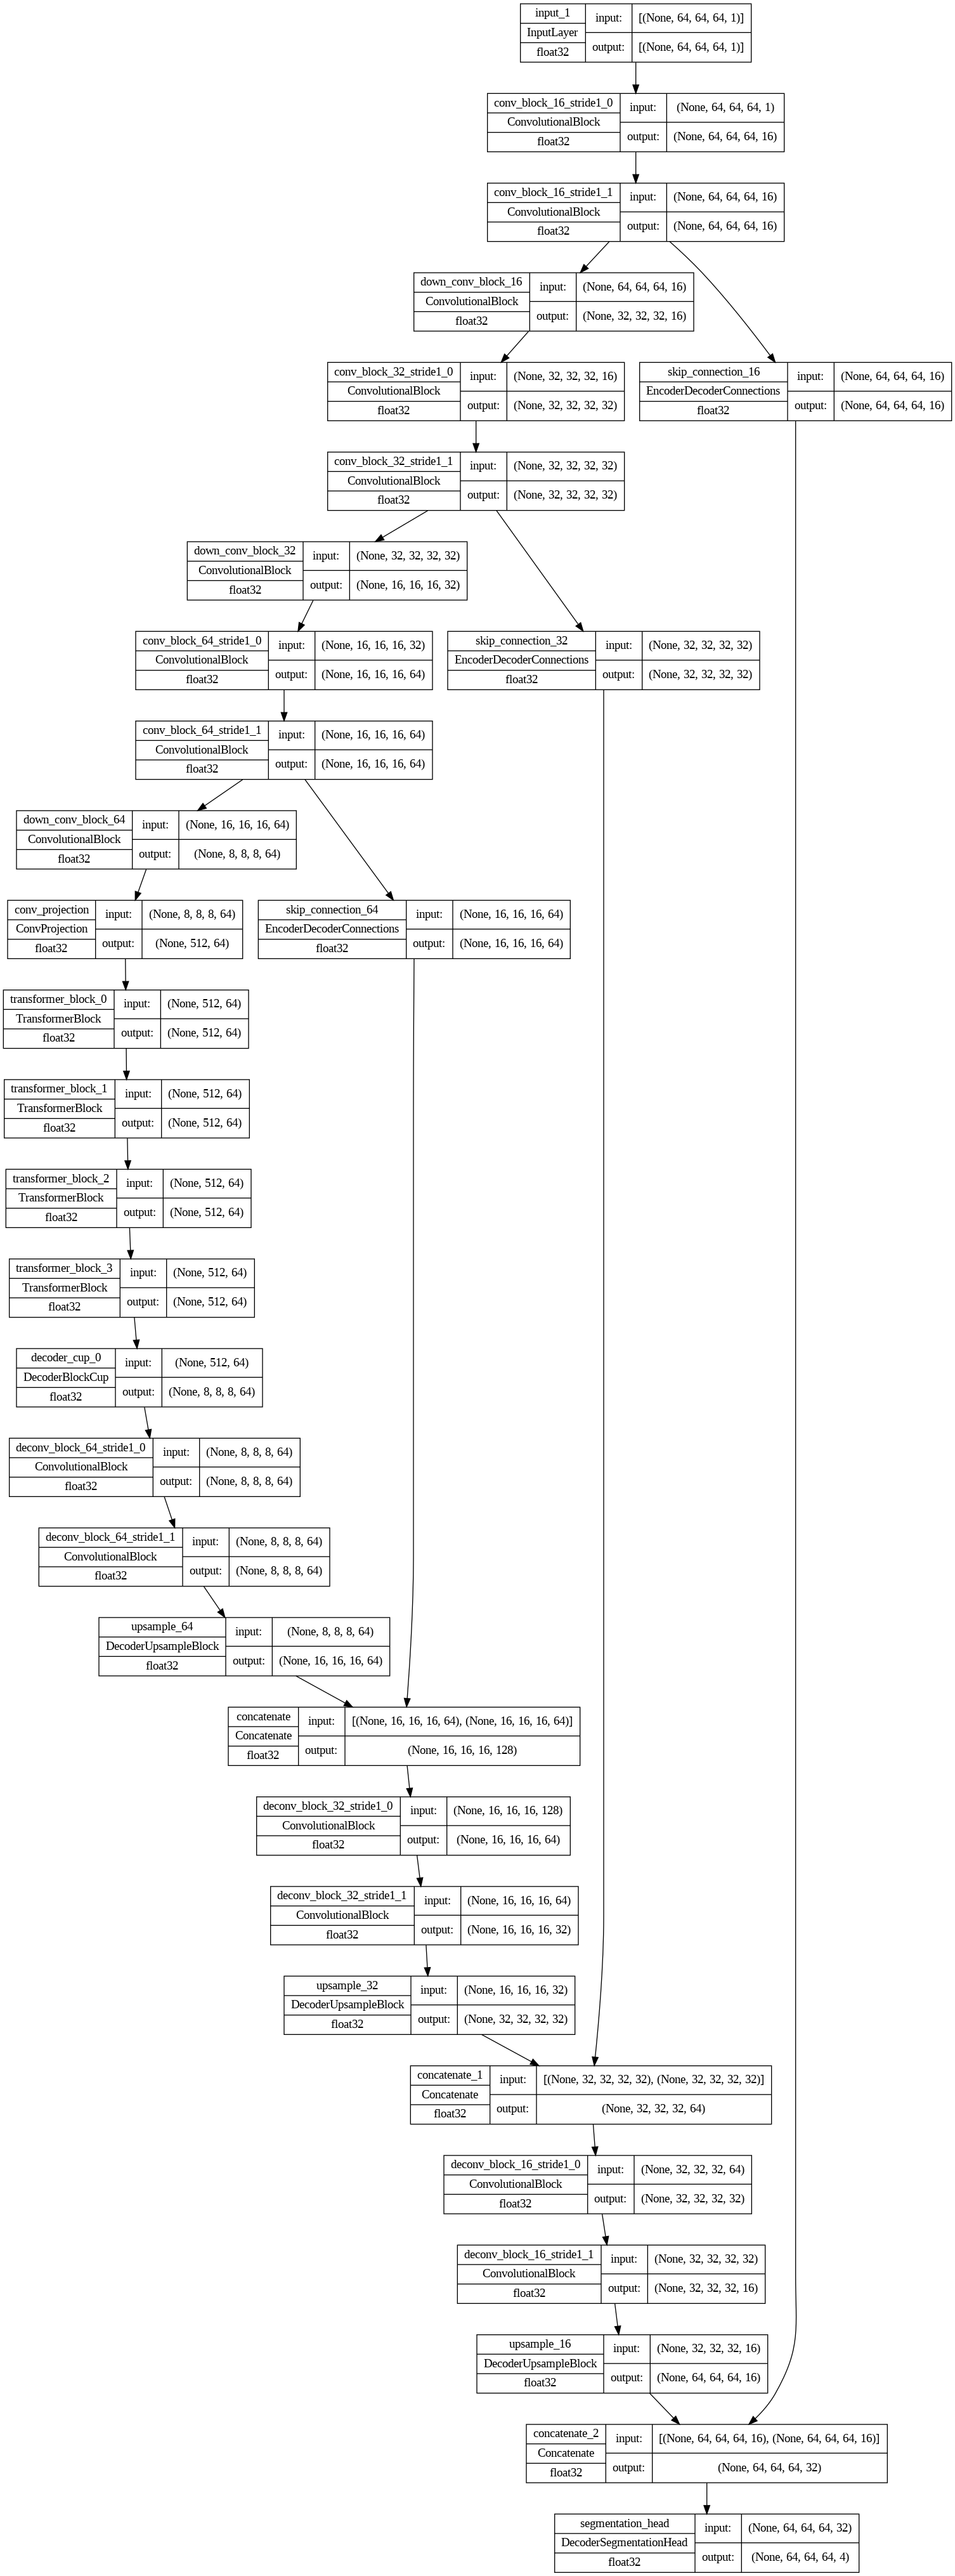

In [ ]:
# Patch 8
config = get_config_local_path_2()
model = build_model(config, 2)

base_dir = '/gdrive/MyDrive/Colab/res/'

model_path = base_dir + 'model_trained_architecture_patch8_2.hdf5'

model.load_weights(model_path)

print(f"[+] Building model with config {config}")
model.summary()

tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

## **Procesamiento de los bloques**

Por cuestiones computacionales, se dividieron las imágenes y máscaras originales en bloques de 64x64x64. Por lo tanto, la entrada de la red está configurada de esta manera.

El dividir las imágenes 3D en estos pequeños cubos implica el reconstruir el bloque general a partir de los bloques pequeños luego de la segmentación de la red.

In [ ]:
from patchify import patchify, unpatchify
import matplotlib.pyplot as plt
import numpy as np

def unpatchify_img_msk(pred_msk, des_shape, size=(192, 192, 192), argmax=True):
  if argmax:
    pred_msk = np.argmax(pred_msk, axis=4)
  pred_msk = np.reshape(pred_msk, (des_shape.shape[0], des_shape.shape[1], des_shape.shape[2],
                                des_shape.shape[3], des_shape.shape[4], des_shape.shape[5]) )
  unpatched_res = unpatchify(pred_msk, size)
  unpatched_res = unpatched_res.astype(np.uint8)
  return unpatched_res

def unpatchify_img(orig_img, des_shape, size=(192, 192, 192)):
  orig_img = np.reshape(orig_img, (des_shape.shape[0], des_shape.shape[1], des_shape.shape[2],
                                des_shape.shape[3], des_shape.shape[4], des_shape.shape[5]) )
  unpatched_res = unpatchify(orig_img, size)
  return unpatched_res

## **Predicción con el modelo**

In [ ]:
base_dir = '/gdrive/MyDrive/Colab/res/'

# Just for getting patchify indexes
mri_data = np.zeros((192, 192, 192))
patch_size = 64
mri_data_patchified = patchify(mri_data, (patch_size, patch_size, patch_size), step=patch_size)

In [ ]:
# Loading original image
image_patched = np.load(base_dir + 'MMRR-21-20.npy')

In [ ]:
# Realizamos la predicción, en este caso cargamos un modelo que segmenta solo 4 estructuras
res = model.predict(image_patched)
print(res.shape)
res = unpatchify_img_msk(res, mri_data_patchified)
print(np.unique(res))

1/1 [==============================] - 13s 13s/step
(27, 64, 64, 64, 4)
[0 1 2 3]


In [ ]:
# Leemos la predicción en el modelo con 37 estructuras
res = unpatchify_img_msk(np.load(base_dir + 'prediction_best_37.npy'), mri_data_patchified, argmax=False)

# Creamos el cubo para la máscara original y sus etiquetas modificadas
orig_msk_patched = np.load(base_dir + 'MMRR-21-20_37_patched_latest.npy').astype(np.uint8)
orig_msk = unpatchify_img_msk(np.load(base_dir + 'MMRR-21-20_37_patched_latest.npy').astype(np.uint8), mri_data_patchified)

# Mostramos cada una de las etiquetas
print(np.unique(res), np.unique(orig_msk))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37]


In [ ]:
# Convirtiendo de parches a imagen (192, 192, 192)
orig_img = unpatchify_img(image_patched, mri_data_patchified)

# Usando palette para colorear etiquetas específicas
palette_2 = np.array([
                        [  0,   0,   0],   # black
                        [245,   245,   245],   # cerebral-white-matter
                        [245,   245,   245],
                        [220, 248,   164],   # cerebellum-white-matter
                        [220, 248,   164],   # cerebellum-white-matter
                        [230, 148, 34],      # Cerebellum-cortex,
                        [230, 148, 34],      # Cerebellum-cortex,
                        [120, 18,  134], # lateral-ventricle
                        [120, 18,  134], # lateral-ventricle
                        [196, 58,  250], #int-lat-vent
                        [196, 58,  250], #int-lat-vent
                        [0,   118, 14], # thalamus
                        [0,   118, 14], # thalamus
                        [122, 186, 220], # caudate
                        [122, 186, 220], # caudate
                        [236, 13,  176], # putamen
                        [236, 13,  176], # putamen
                        [12,  48,  255], # pallidum
                        [12,  48,  255], # pallidum
                        [204, 182, 142], # 3rd-ventricle
                        [42,  204, 164], # 4th-ventricle
                        [119, 159, 176], # brain-stem
                        [220, 216, 20], # hippocampus
                        [220, 216, 20], # hippocampus
                        [103, 255, 255], # amygdala
                        [103, 255, 255], # amygdala
                        [60,  60,  60], # csf
                        [255, 165, 0], # accumbens-area
                        [255, 165, 0], # accumbens-area
                        [165, 42,  42], # ventraldc
                        [165, 42,  42], # ventraldc
                        [0,   200, 200], # choroid plexus
                        [0,   200, 200], # choroid plexus
                        [0,   0,   64], # cc_posterior
                        [0,   0,   112], # cc_mid_posterior
                        [0,   0,  160], # cc_central,
                        [0,  0,   208], # cc_mid_anterior
                        [0,   0,   255], # cc_anterior
                    ])

# palette_2 = np.array([
#                         [  0,   0,   0],  # black
#                         [255,   0,   0],  # cerebral-white-matter | red
#                         [255,   0,   0],  # cerebral-white-matter | red
#                         [  0, 255,   0],  # cerebellum-white-matter | green
#                         [  0, 255,   0],  # cerebellum-white-matter | green
#                         [  0,   0, 255],  # Cerebellum-cortex, | blue
#                         [  0,   0, 255],  # Cerebellum-cortex, | blue
#                         [120, 18,  134],  # lateral-ventricle
#                         [120, 18,  134],  # lateral-ventricle
#                         [125,   33, 129],  # thalamus | purple
#                         [125,   33, 129],  # thalamus | purple
#                         [220, 216, 20],  # putamen | yellow
#                         [220, 216, 20],  # putamen | yellow
#                         [35, 245, 166],  # 3rd-ventricle
#                         [35, 150, 245],  # 4rd-ventricle
#                         [102, 131, 154],  # brain-stem
#                         [245,0,190],  # hippocampus
#                         [245,0,190],  # hippocampus
#                         [186,109,109],  # ventraldc
#                         [186,109,109],  # ventraldc
#                         [145,215,14],  # caudalmiddlefrontal
#                         [145,215,14],  # caudalmiddlefrontal
#                         [105,61,92],  # cuneus
#                         [105,61,92],  # cuneus
#                         [68,105,61],  # fusiform
#                         [68,105,61],  # fusiform
#                         [179,187,85],  # inferiorparietal
#                         [179,187,85],  # inferiorparietal
#                         [187,85,155],  # lateraloccipital
#                         [187,85,155],  # lateraloccipital
#                         [90, 174, 175],  # postcentral
#                         [90, 174, 175],  # postcentral
#                         [216,177,79],   # rostralmiddlefrontal
#                         [216,177,79],   # rostralmiddlefrontal
#                         [216,100,79],  # superiorfrontal
#                         [216,100,79],  # superiorfrontal
#                         [0,   200, 200],  # insula
#                         [0,   200, 200],  # insula
#                     ])

print(np.unique(orig_msk), np.unique(res), res.shape)

rgb_orig = palette_2[orig_msk]
rgb_pred = palette_2[res]
rgb_pred_2 = palette_2[res] # Second pred

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37] (192, 192, 192)


# Visualicemos resultados por plano

In [ ]:
# Index en vista saggital

def show_slide_in_plane(idx:int, plane:str, save_fig=False):

  orig_slide_img = None
  orig_slide_msk = None
  pred_slide_msk = None

  if plane == 'saggital':
    orig_slide_img = orig_img[idx, :, :]
    orig_slide_msk = rgb_orig[idx, :, :]
    pred_slide_msk = rgb_pred_2[idx, :, :]

  elif plane == 'axial':
    orig_slide_img = orig_img[:, idx, :]
    orig_slide_msk = rgb_orig[:, idx, :]
    pred_slide_msk = rgb_pred_2[:, idx, :]

  else:
    # coronal
    orig_slide_img = orig_img[:, :, idx]
    orig_slide_msk = rgb_orig[:, :, idx]
    pred_slide_msk = rgb_pred_2[:, :, idx]

  # Subplots
  fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 20))

  ax1.set_title('Orig img')
  ax1.imshow(orig_slide_img, vmin=0, vmax=1, cmap='gray')

  ax2.set_title('Orig msk')
  ax2.imshow(orig_slide_msk)

  ax3.set_title('Predicted msk patch 8')
  ax3.imshow(pred_slide_msk)

  if save_fig:
    plt.savefig(base_dir+f"patch_{idx}.png")

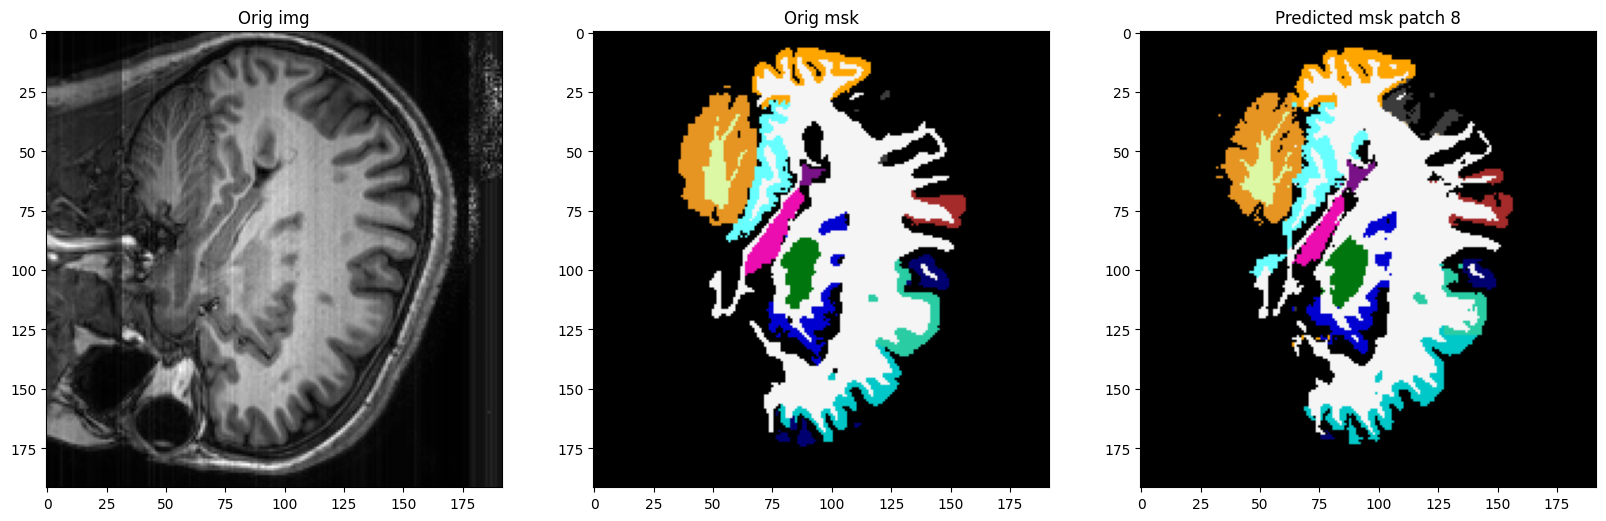

In [ ]:
show_slide_in_plane(idx=55, plane='saggital')

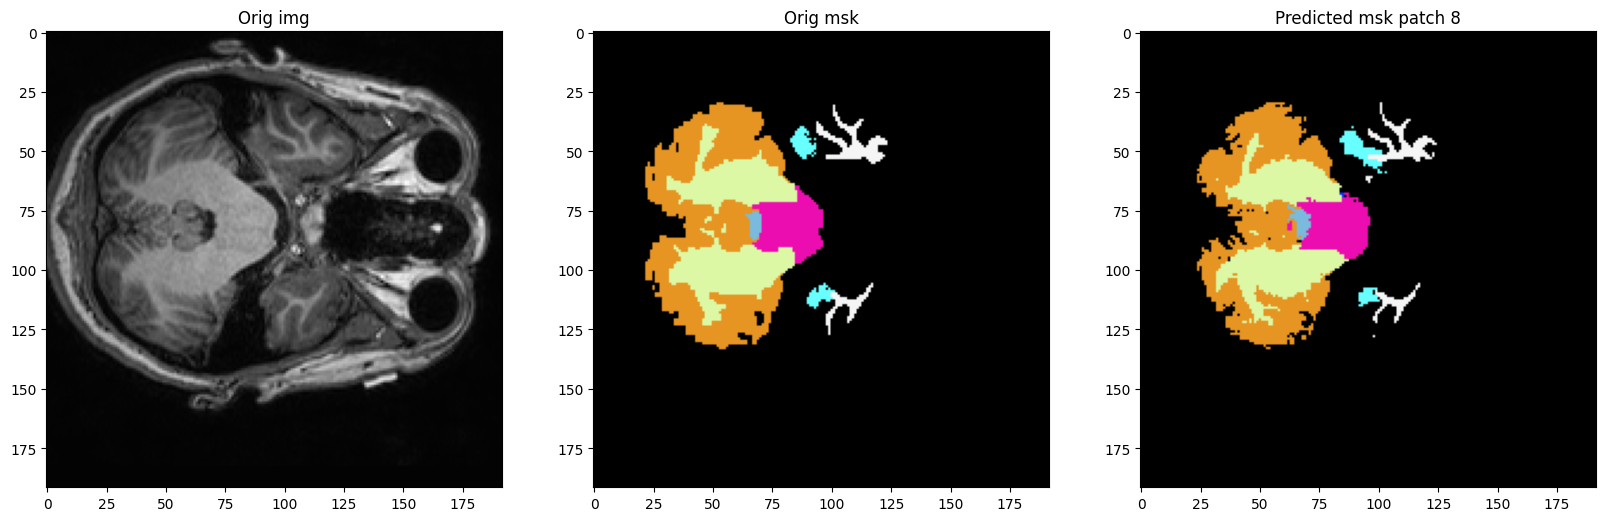

In [ ]:
show_slide_in_plane(idx=55, plane='coronal')

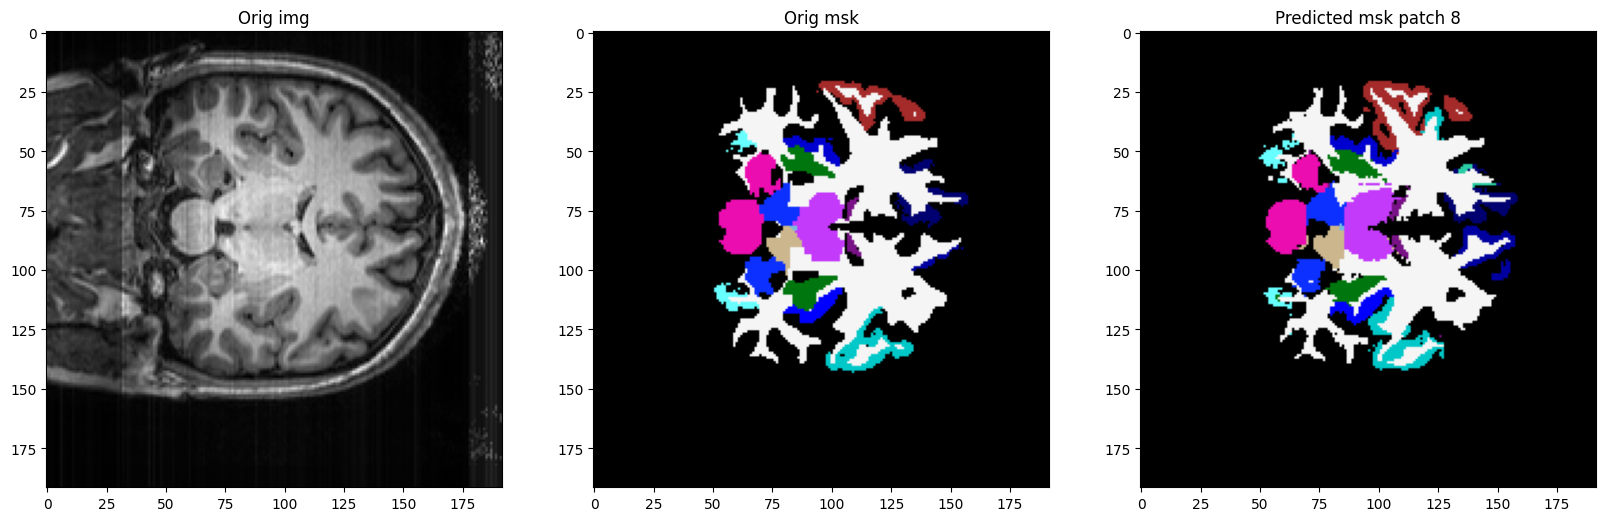

In [ ]:
show_slide_in_plane(idx=95, plane='axial')

In [ ]:
from segmentation_models.metrics import FScore

## Dice Score or F1-Score

F1-Score puede interpretarse como un "promedio ponderado" (media armonica) del precision y el recall, donde esta alcanza su mejor valor en 1 y el peor valor en 0. La contribución relativa de ambas métricas es igual.

Es decir, esta métrica debe usarse en situaciones donde nos interese tener en cuenta como los datos se encuentran distribuidos (ejemplo: datos desbalanceados).

F1 Score = 2 * (Precision * Recall) / (Precision + Recall)

Así mismo, el maximizar la metrica F1 indica que también estamos maximizando el precision y recall, lo cual es beneficioso dependiendo el problema.

In [ ]:
n_labels = len(np.unique(orig_msk)) - 1
print(f"Number of labels: {n_labels}")

Number of labels: 37


In [ ]:
from sklearn.metrics import classification_report

STRUCTURES = [
    "background",
    "left-cerebral-white-matter",
    "right-cerebral-white-matter",
    "left-cerebellum-white-matter",
    "right-cerebellum-white-matter",
    "left-cerebellum-cortex",
    "right-cerebellum-cortex",
    "left-lateral-ventricle",
    "right-lateral-ventricle",
    "left-thalamus",
    "right-thalamus",
    "left-putamen",
    "right-putamen",
    "3rd-ventricle",
    "4th-ventricle",
    "brain-stem",
    "left-hippocampus",
    "right-hippocampus",
    "left-ventraldc",
    "right-ventraldc",
    "ctx-lh-caudalmiddlefrontal",
    "ctx-rh-caudalmiddlefrontal",
    "ctx-lh-cuneus",
    "ctx-rh-cuneus",
    "ctx-lh-fusiform",
    "ctx-rh-fusiform",
    "ctx-lh-inferiorparietal",
    "ctx-rh-inferiorparietal",
    "ctx-lh-lateraloccipital",
    "ctx-rh-lateraloccipital",
    "ctx-lh-postcentral",
    "ctx-rh-postcentral",
    "ctx-lh-rostralmiddlefrontal",
    "ctx-rh-rostralmiddlefrontal",
    "ctx-lh-superiorfrontal",
    "ctx-rh-superiorfrontal",
    "ctx-lh-insula",
    "ctx-rh-insula",
]

In [ ]:
print(classification_report(orig_msk.astype(np.float32).flatten(), res.astype(np.float32).flatten(), target_names=STRUCTURES))

                               precision    recall  f1-score   support

                   background       0.99      0.99      0.99   6181770
   left-cerebral-white-matter       0.95      0.91      0.93    245565
  right-cerebral-white-matter       0.97      0.89      0.93    242766
 left-cerebellum-white-matter       0.90      0.75      0.82     14572
right-cerebellum-white-matter       0.93      0.77      0.85     15463
       left-cerebellum-cortex       0.87      0.82      0.84     45829
      right-cerebellum-cortex       0.89      0.72      0.80     47580
       left-lateral-ventricle       0.64      0.91      0.75      2888
      right-lateral-ventricle       0.78      0.91      0.84      3570
                left-thalamus       0.80      0.92      0.86      7123
               right-thalamus       0.90      0.89      0.89      7129
                 left-putamen       0.85      0.84      0.85      7157
                right-putamen       0.91      0.81      0.86      6926
     

- Precision -> Vóxeles de la imagen se clasificaron correctamente para la clase específica (usar para minimizar falsos positivos)

- Recall -> Es el ratio de elementos positivos que fueron predichos correctamente por el modelo de segmentación (usar para maximizar verdaderos positivos)

- F1-Score: Media harmonica de las dos anteriores (en segmentación nos interesan estas dos características)
- Support: Número de ocurrencias de una clase dada en el conjunto de datos (en este caso, el ground truth de la imagen)